## 9.0 Dataset Aggregation

> In notebooks 1 through 8 I analyzed the various provided raw datasets and then selected and created various features that were saved to a coresponding pre-processed dataset.  In this notebook I combined all the pre-processed dataset into one and then save it to file. 

> Also after visualizing the probability by target of some of the fields I decided to remove them as feature since there was not much of difference between defaults and non-defaults.

In [19]:
#import helper ultility module
%load_ext autoreload
%aimport utils
%autoreload 1

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [20]:
import pandas as pd
pd.options.display.float_format = '{:,.2f}'.format
pd.set_option('display.max_rows', 100)

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### 9.1 Import Datasets And Prepare ABT
> - Import the all the pre-processed datates combined into one dataframe
> - Create Activity Base Table (ABT) to group the fields by type.

In [21]:
dataset =  utils.get_pre_processed_combined()

In [22]:
#lets analyze the training set
train_df = dataset[dataset['DATASET'] == 'train']

In [23]:
dataset.head()

,SK_ID_CURR,TARGET,DATASET,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,CC_CNT_INSTALMENT_MATURE_CUM_MEAN,CC_CNT_INSTALMENT_MATURE_CUM_STD,CC_SK_DPD_MIN,CC_SK_DPD_MAX,CC_SK_DPD_MEAN,CC_SK_DPD_STD,CC_SK_DPD_DEF_MIN,CC_SK_DPD_DEF_MAX,CC_SK_DPD_DEF_MEAN,CC_SK_DPD_DEF_STD
0,100002,1.00,train,12.22,12.92,10.11,0.02,"-9,461.00",-637.00,114.13,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,100003,0.00,train,12.51,14.07,10.48,0.00,"-16,765.00","-1,188.00",64.68,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,100004,0.00,train,11.12,11.81,8.82,0.01,"-19,046.00",-225.00,123.37,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,100006,0.00,train,11.81,12.65,10.30,0.01,"-19,005.00","-3,039.00",187.48,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,100007,0.00,train,11.71,13.15,9.99,0.03,"-19,932.00","-3,038.00",124.11,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [24]:
abt = utils.ABT(dataset)
abt.info()

Column count: 245
--------------------
Row count: 344971
--------------------
Types:
--------------------
Type: float64 Count: 213
Type: int64 Count: 19
Type: object Count: 13


### 9.1(a) Float Types
> - These fields came from the various pre-processed datasets.

In [25]:
float_table = abt.float_table
print("Total float64 types: {}".format(len(float_table)))
float_table 

Total float64 types: 212


,num,count,na_count,na_%,mean,std,min,25%,50%,75%,max
AMT_INCOME_TOTAL,1,"344,971.00",0.00,0.00,11.90,0.46,10.20,11.63,11.88,12.22,15.30
AMT_CREDIT,2,"344,971.00",0.00,0.00,13.04,0.71,10.71,12.51,13.12,13.58,15.21
AMT_ANNUITY,3,"344,971.00",0.00,0.00,10.07,0.54,7.59,9.72,10.12,10.45,12.32
REGION_POPULATION_RELATIVE,4,"344,971.00",0.00,0.00,0.02,0.01,0.00,0.01,0.02,0.03,0.07
DAYS_BIRTH,5,"344,971.00",0.00,0.00,"-16,020.73","4,359.13","-25,201.00","-19,654.00","-15,726.00","-12,402.00","-7,338.00"
DAYS_EMPLOYED,6,"344,971.00",0.00,0.00,"-1,966.96","2,309.37","-17,912.00","-2,784.00","-1,228.00",-296.00,0.00
DAYS_REGISTRATION,7,"344,971.00",0.00,0.00,122.54,51.88,-1.82,83.82,126.46,163.11,296.42
DAYS_ID_PUBLISH,8,"344,971.00",0.00,0.00,"-3,002.73","1,516.64","-7,197.00","-4,317.00","-3,253.00","-1,719.00",0.00
HOUR_APPR_PROCESS_START,9,"344,971.00",0.00,0.00,12.01,3.26,0.00,10.00,12.00,14.00,23.00
EXT_SOURCE_2,10,"344,971.00",0.00,0.00,0.51,0.19,0.00,0.39,0.56,0.66,0.85


### 9.1(b) Integer Types
> - The integers types are categorical features represented by integer values.
> - These fields came from the `applications` datatset.

In [26]:
#exclude the ['SK_ID_CURR','TARGET','DATASET'] fields from the ABT
int_table = abt.int_table
print("Total int64 types: {}".format(len(int_table)))
int_table 

Total int64 types: 18


,num,count,na_count,na_%,unique,top,top_count,top_%
column,,,,,,,,
CNT_FAM_MEMBERS,1,344971,0,0.00,8,2,178530,0.52
OBS_60_CNT_SOCIAL_CIRCLE,2,344971,0,0.00,7,0,184010,0.53
DEF_60_CNT_SOCIAL_CIRCLE,3,344971,0,0.00,5,0,315649,0.92
RETIRED,4,344971,0,0.00,2,0,282932,0.82
FLAG_EMP_PHONE,5,344971,0,0.00,2,1,282920,0.82
FLAG_WORK_PHONE,6,344971,0,0.00,2,0,275632,0.80
FLAG_PHONE,7,344971,0,0.00,2,0,251475,0.73
FLAG_EMAIL,8,344971,0,0.00,2,0,320809,0.93
REGION_RATING_CLIENT,9,344971,0,0.00,3,2,260378,0.75


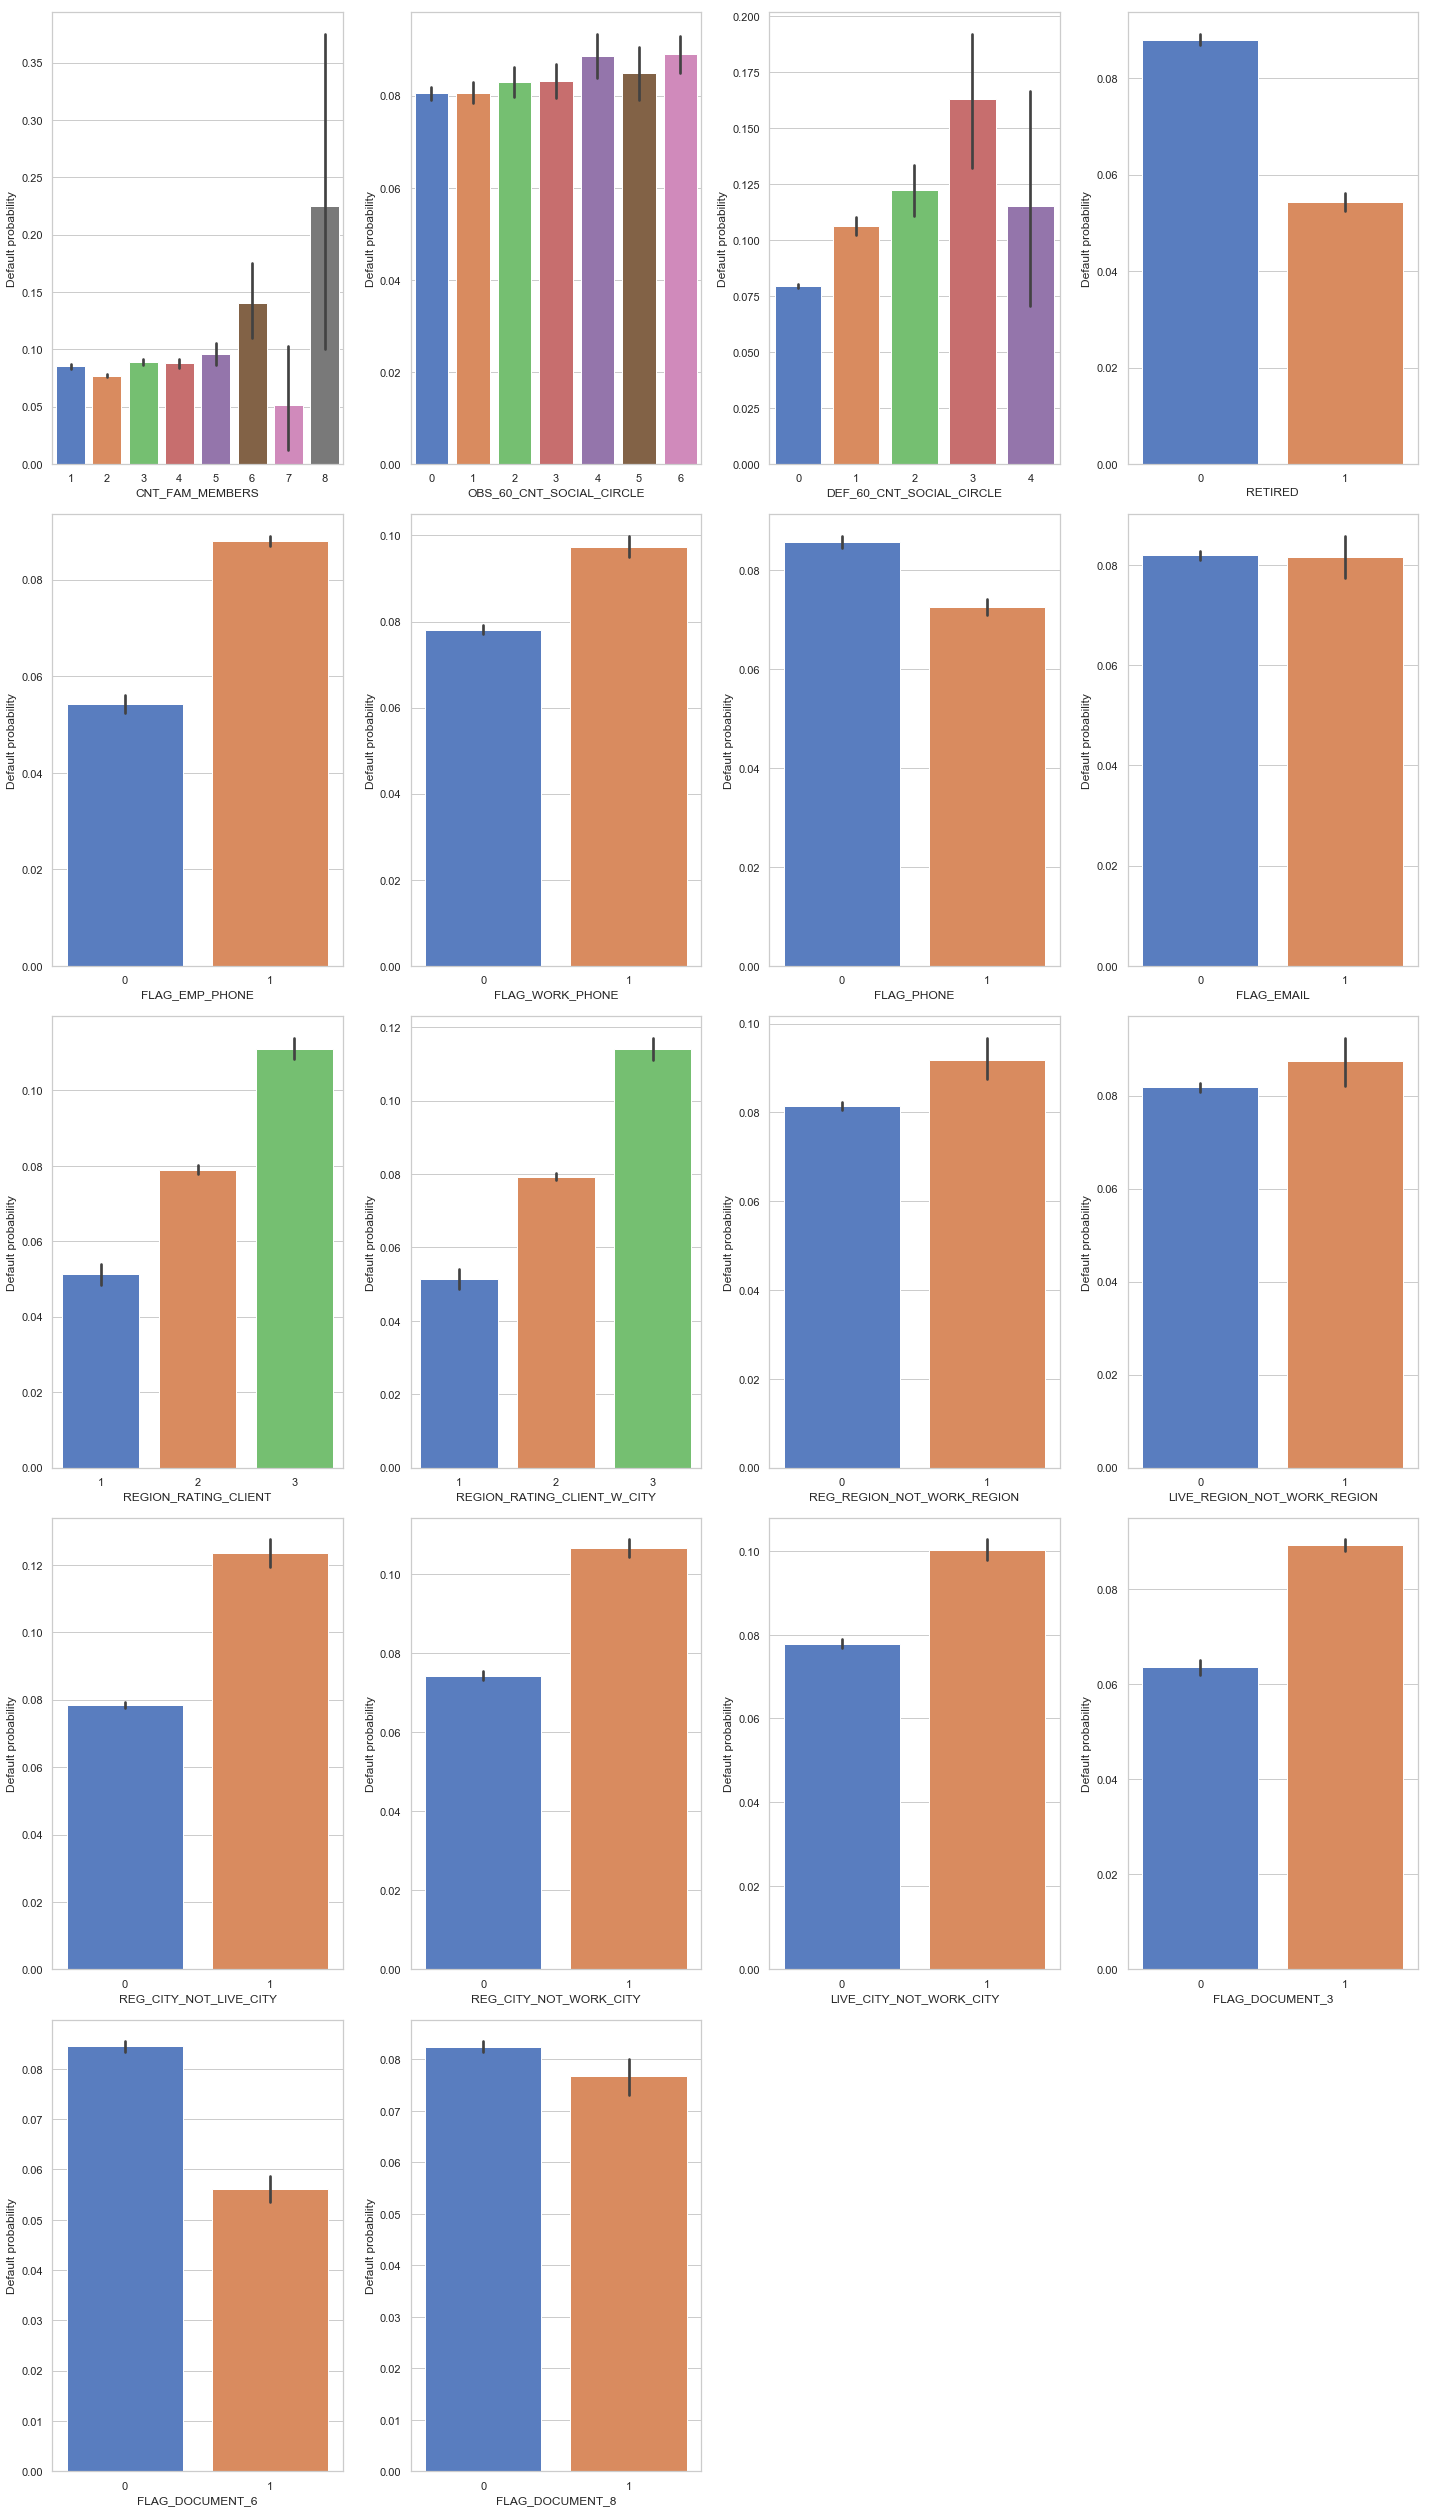

In [27]:
utils.plot_bar_prob(int_table.index,train_df)

In [28]:
#exclude some fields as features fields
exclude_feature_ints = []

exclude_feature_ints.append('CNT_FAM_MEMBERS')
exclude_feature_ints.append('OBS_60_CNT_SOCIAL_CIRCLE')
exclude_feature_ints.append('FLAG_EMAIL')
exclude_feature_ints.append('LIVE_REGION_NOT_WORK_REGION')
exclude_feature_ints.append('BUREAU_CREDIT_TYPE_COUNT')

### 9.1(c) String Types
> - The string types are categorical features that all came from the `applications` dataset.

In [29]:
other_table = abt.other_table
print("Total string types: {}".format(len(other_table)))
other_table 

Total string types: 12


,num,count,na_count,na_%,unique,top,top_count,top_%
column,,,,,,,,
NAME_CONTRACT_TYPE,1,344971,0,0.00,2,Cash loans,316679,0.92
CODE_GENDER,2,344971,0,0.00,3,F,228077,0.66
FLAG_OWN_CAR,3,344971,0,0.00,2,N,228293,0.66
FLAG_OWN_REALTY,4,344971,0,0.00,2,Y,239383,0.69
NAME_TYPE_SUITE,5,344971,0,0.00,7,Unaccompanied,280725,0.81
NAME_INCOME_TYPE,6,344971,0,0.00,8,Working,180723,0.52
NAME_EDUCATION_TYPE,7,344971,0,0.00,5,Secondary / secondary special,246604,0.71
NAME_FAMILY_STATUS,8,344971,0,0.00,6,Married,221733,0.64
NAME_HOUSING_TYPE,9,344971,0,0.00,6,House / apartment,306774,0.89


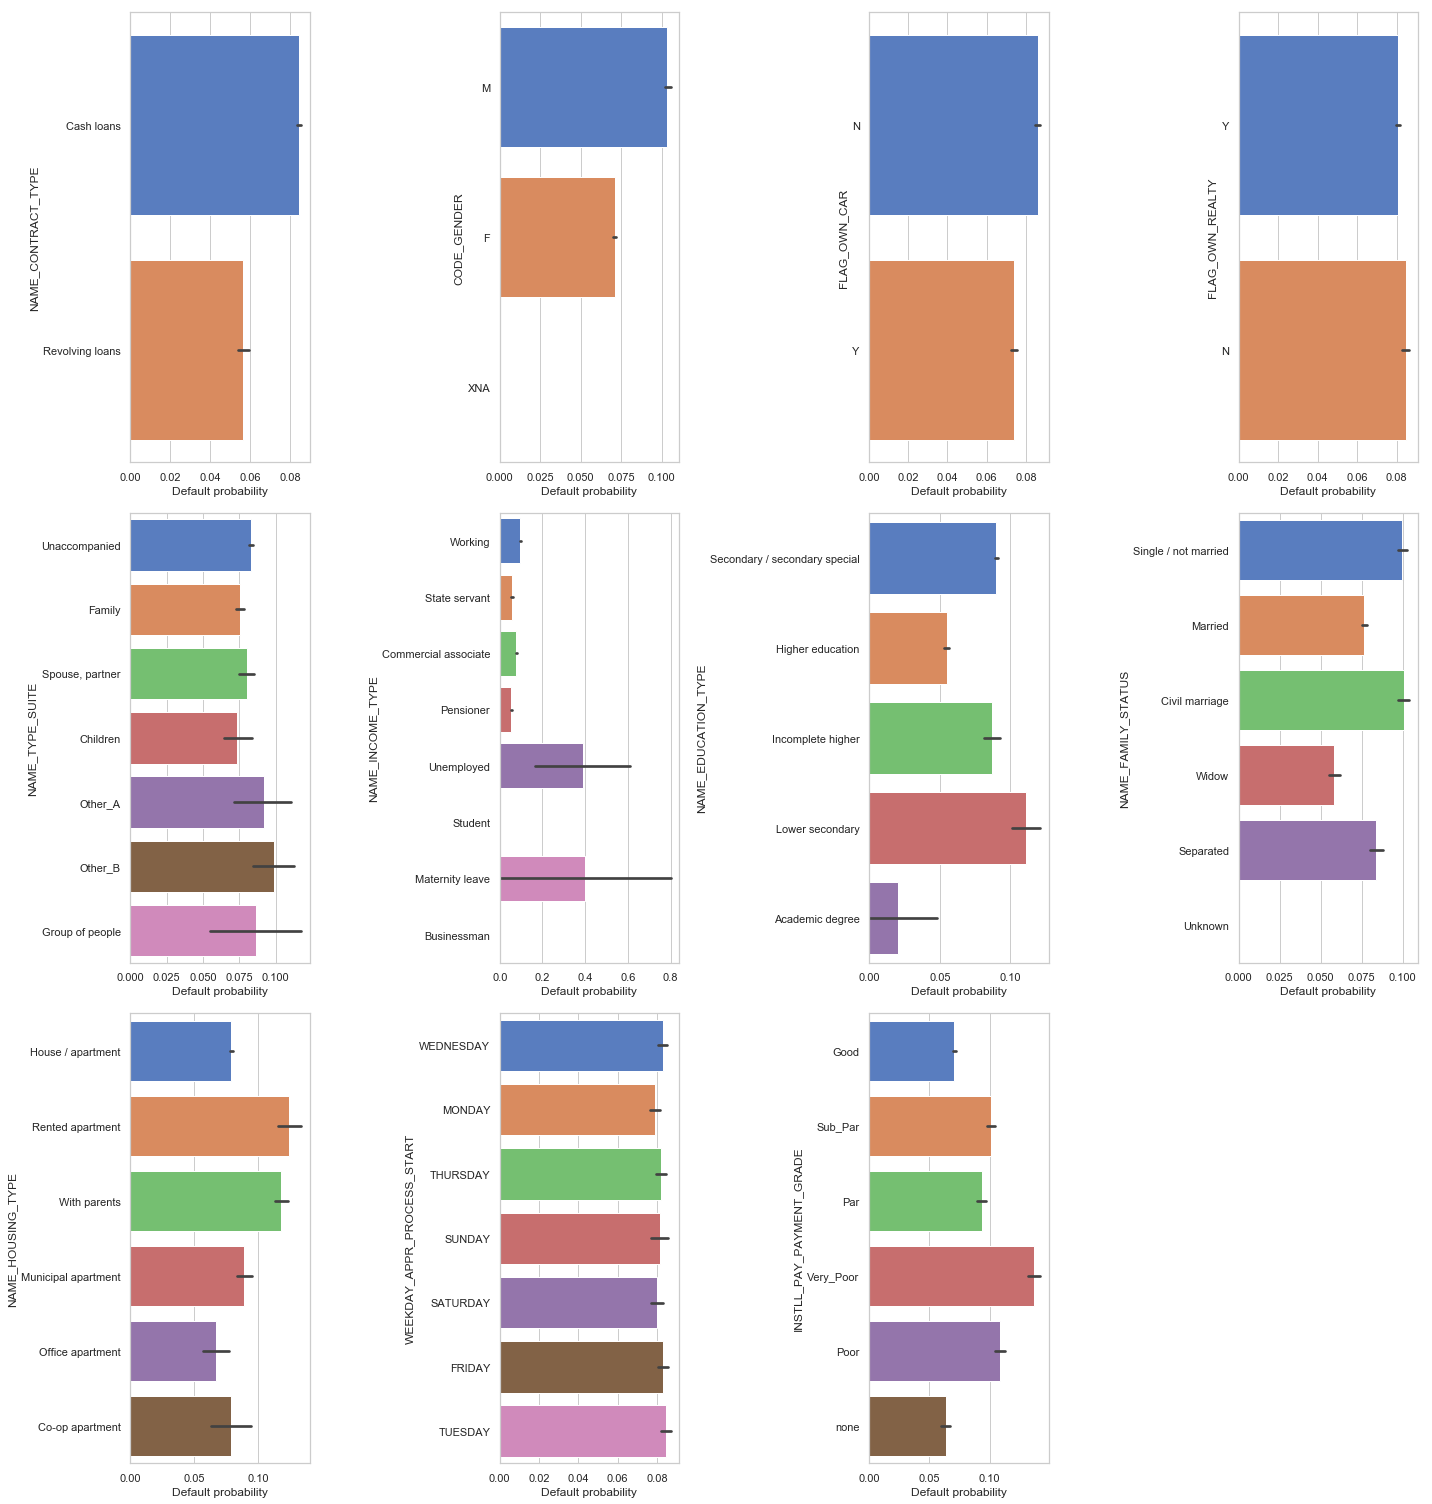

In [30]:
plot_fields = [f for f in other_table.index.values if f not in 'ORGANIZATION_TYPE']
utils.plot_hbar_prob(plot_fields,train_df)

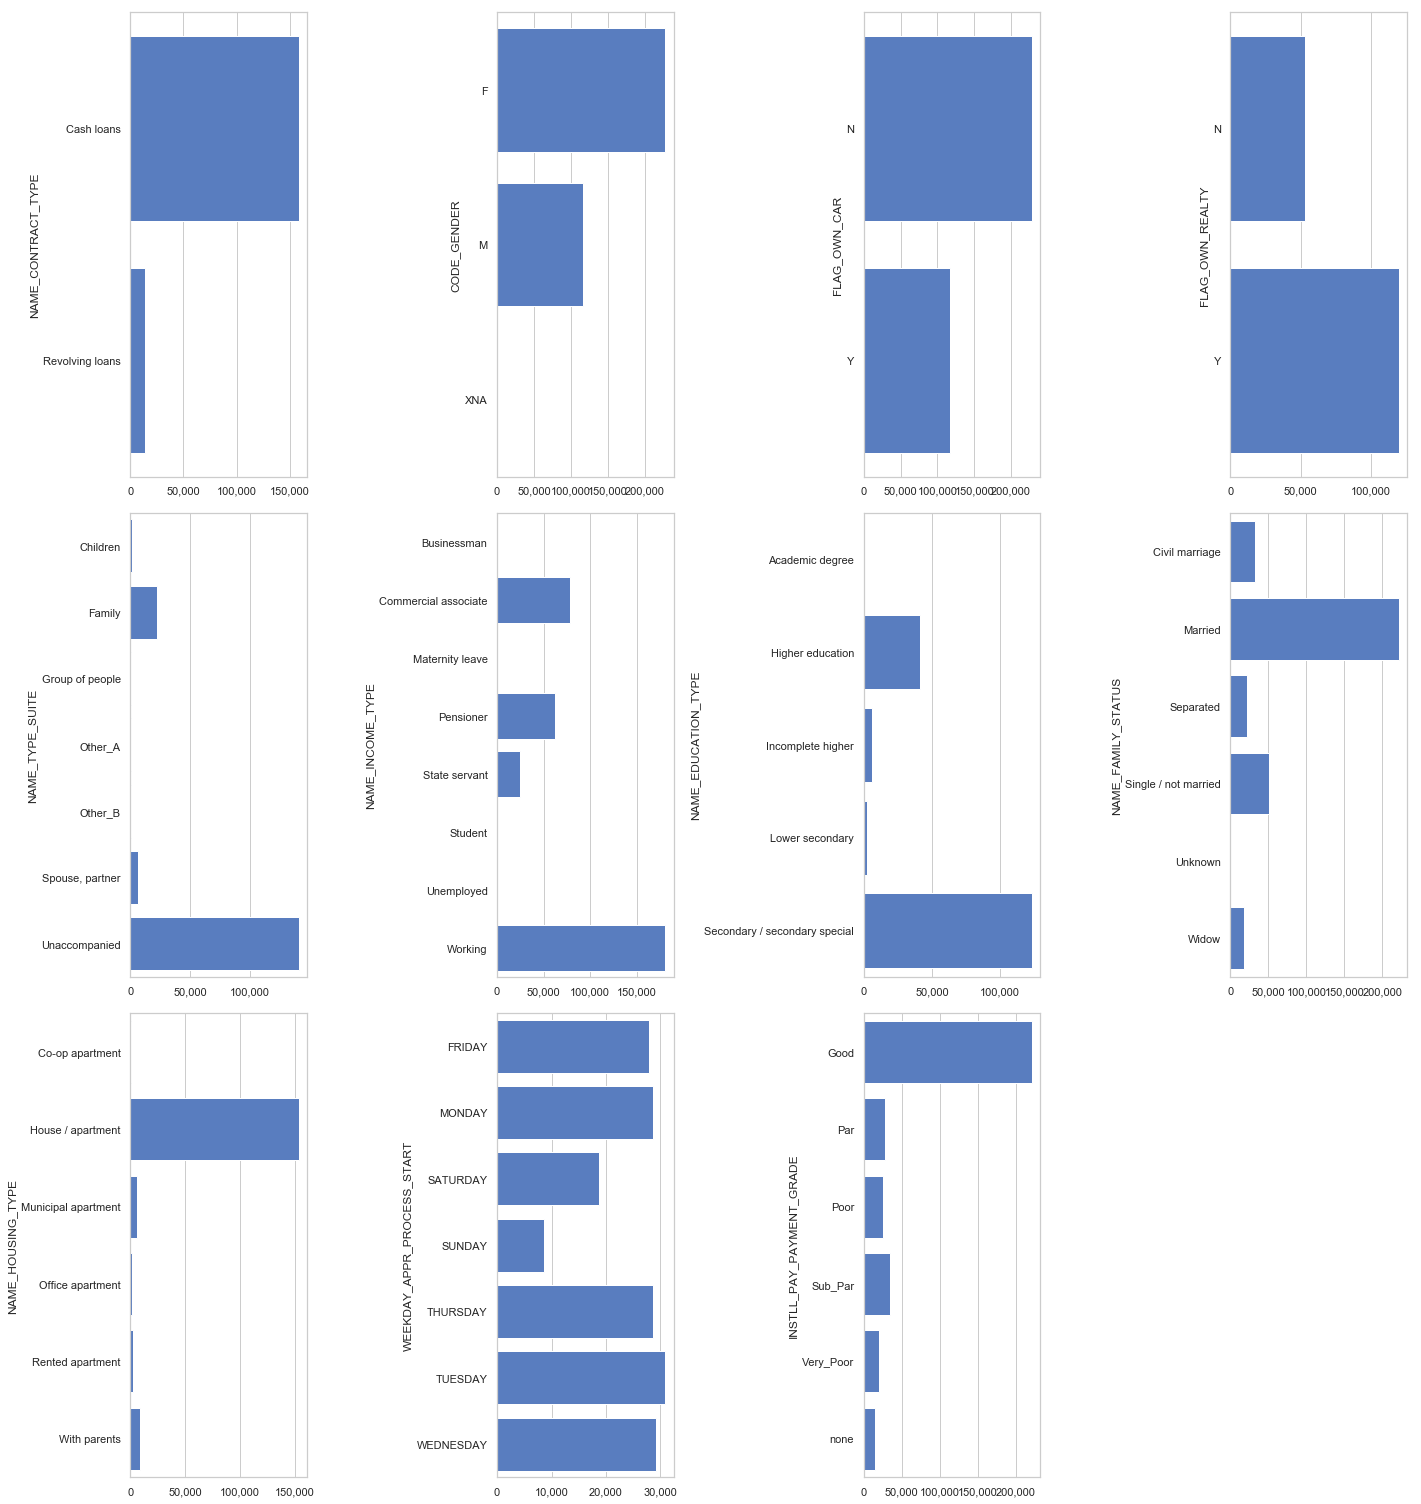

In [31]:
# lets plot the fields but excluded 'ORGANIZATION_TYPE'  since it has a lot of different values
# 'ORGANIZATION_TYPE' will be plotted seperately
# this plot count by each category
plot_fields = [f for f in other_table.index.values if f not in 'ORGANIZATION_TYPE']
utils.plot_hbar(plot_fields,dataset,w=20,h=7)

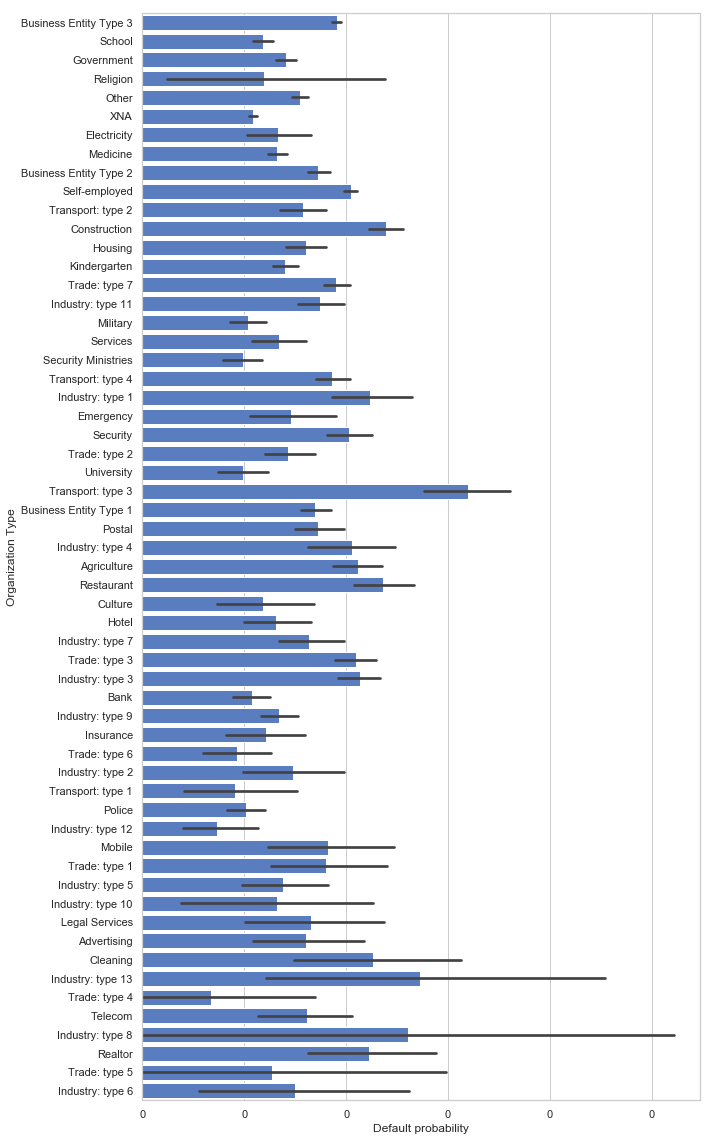

In [32]:
#plot 'ORGANIZATION_TYPE' 
f, ax = plt.subplots(figsize=(10, 20))

# cnt = dataset.groupby('ORGANIZATION_TYPE').size()
sns.barplot(y='ORGANIZATION_TYPE',x='TARGET', data=train_df, color="b", ax=ax)
ax.set_xticklabels(['{:,.0f}'.format(x) for x in ax.get_xticks()])

ax.set_xlabel("Default probability")
ax.set_ylabel('Organization Type')

plt.show()

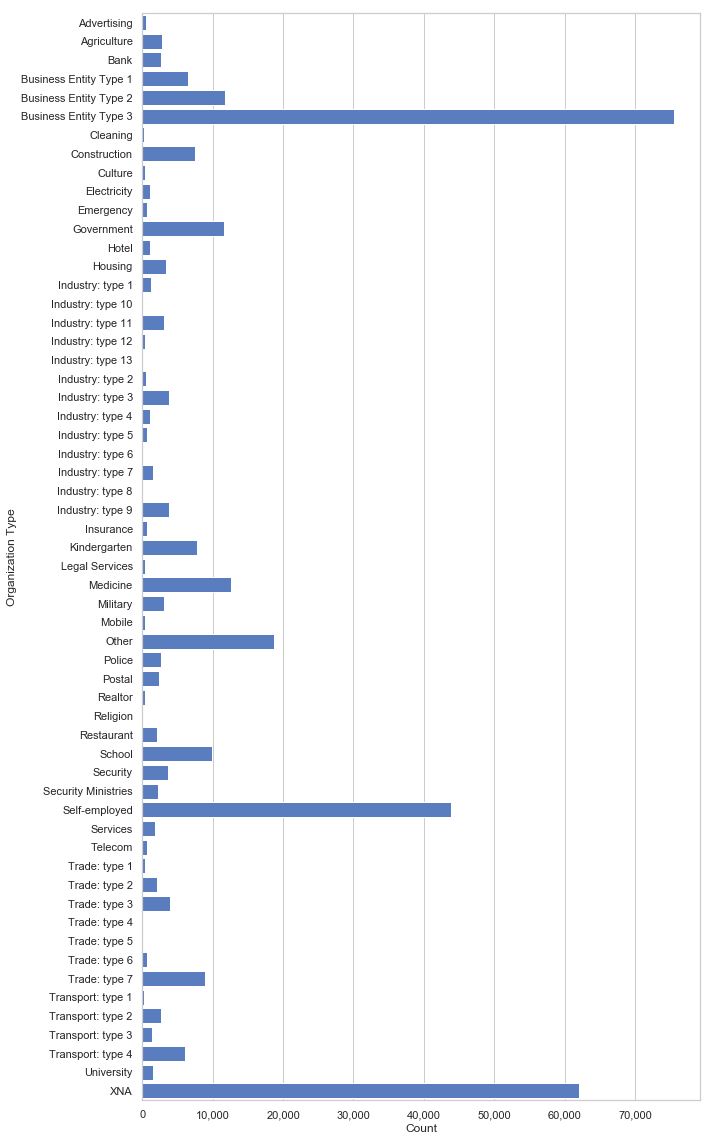

In [33]:
#plot 'ORGANIZATION_TYPE' 
f, ax = plt.subplots(figsize=(10, 20))

cnt = dataset.groupby('ORGANIZATION_TYPE').size()
sns.barplot(y=cnt.index,x=cnt.values, color="b", ax=ax)
ax.set_xticklabels(['{:,.0f}'.format(x) for x in ax.get_xticks()])

ax.set_xlabel('Count')
ax.set_ylabel('Organization Type')

plt.show()

In [34]:
exclude_features_other = []

exclude_features_other.append('FLAG_OWN_REALTY')
exclude_features_other.append('NAME_TYPE_SUITE')
exclude_features_other.append('WEEKDAY_APPR_PROCESS_START')
exclude_features_other.append('ORGANIZATION_TYPE')

### 9.2 Final Featues
> - Create list of final features

In [35]:
#get features we want to exclude.
exclude_f = exclude_feature_ints + exclude_features_other

final_features = [f for f in dataset.columns  if f not in exclude_f ]
print("Final features count {}.".format(len(final_features))) 

Final features count 236.


### 9.3 Save Combined Dataset To File


In [36]:
dataset[final_features].to_csv('data_merged/combined_dataset.csv',index=False)
print("Dataset saved to file.")

Dataset saved to file.
